# EDA DE SEQUÍAS

## 1. IMPORTAR LIBRERÍAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. CARGAR DATASET

In [5]:
df = pd.read_csv('../../Data/01CrudoNoEditar/01desastres_crudo_renamedcols.csv', delimiter=';', encoding= 'utf-8')
df.head(2)

C:\Users\blanc\AppData\Local\Temp\ipykernel_22244\4200316577.py:1: DtypeWarning: Columns (18,24,25,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/01CrudoNoEditar/01desastres_crudo_renamedcols.csv', delimiter=';', encoding= 'utf-8')


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Reconstruction Costs Adj,Insured Damages,Insured Damages Adj,Total Damages,Total Damages Adj,CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN


In [6]:
df.shape

(16636, 50)

In [7]:
filter = df['Disaster Type'] == 'Drought'
df[filter].head(2)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Reconstruction Costs Adj,Insured Damages,Insured Damages Adj,Total Damages,Total Damages Adj,CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN


In [9]:
df_drought = df[filter]
df_drought.shape

(803, 50)

In [10]:
df_drought.isnull().sum()

Dis No                        0
Year                          0
Seq                           0
Glide                       702
Disaster Group                0
Disaster Subgroup             0
Disaster Type                 0
Disaster Subtype              1
Disaster Subsubtype         803
Event Name                  803
Country                       0
ISO                           0
Region                        0
Continent                     0
Location                    171
Origin                      638
Associated Dis              513
Associated Dis2             760
OFDA Response               625
Appeal                      614
Declaration                 537
AID Contribution            770
Dis Mag Value               752
Dis Mag Scale                 0
Latitude                    803
Longitude                   803
Local Time                  803
River Basin                 803
Start Year                    0
Start Month                 186
Start Day                   790
End Year

In [ ]:
# Tenemos 803 eventos de sequía, la columna Total Deaths  tiene nulos 732 datos y aún así tenemos un número de fallecidos de 11 millones de personas

In [ ]:
df_drought_cols_numeric = df_drought['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected']

In [11]:
df_drought['Total Deaths'].sum()

11734025.0

In [12]:
df_drought['Total Deaths'].value_counts()

4.0          2
2.0          2
20.0         2
50.0         2
8.0          2
100000.0     2
600.0        2
2000.0       2
9.0          2
1500000.0    2
20000.0      2
12.0         2
500.0        2
85.0         1
41.0         1
143.0        1
21.0         1
115.0        1
37.0         1
58.0         1
11000.0      1
120.0        1
79.0         1
80.0         1
60.0         1
134.0        1
27.0         1
11.0         1
24.0         1
77.0         1
45.0         1
136.0        1
6.0          1
3000.0       1
672.0        1
237.0        1
24000.0      1
500000.0     1
3000000.0    1
1900000.0    1
30000.0      1
8000.0       1
85000.0      1
1200000.0    1
19000.0      1
18.0         1
300000.0     1
367.0        1
1400.0       1
63.0         1
280.0        1
150000.0     1
230.0        1
84.0         1
300.0        1
200.0        1
1250000.0    1
2465.0       1
Name: Total Deaths, dtype: int64

Hay dos eventos con 1.500.000 de fallecidos, otro con 1.250.000, otro con 3.000.00, otro con 1.900.00,, otro con 1.200.000,

In [13]:
df_drought.groupby('Continent')['Total Deaths'].sum()

Continent
Africa       869596.0
Americas        266.0
Asia        9663477.0
Europe      1200002.0
Oceania         684.0
Name: Total Deaths, dtype: float64

In [14]:
df_drought.groupby('Continent')['Total Deaths'].value_counts()

Continent  Total Deaths
Africa     9.0             2
           50.0            2
           500.0           2
           20000.0         2
           100000.0        2
                          ..
Europe     2.0             1
           1200000.0       1
Oceania    24.0            1
           60.0            1
           600.0           1
Name: Total Deaths, Length: 65, dtype: int64

<Axes: xlabel='Continent', ylabel='count'>

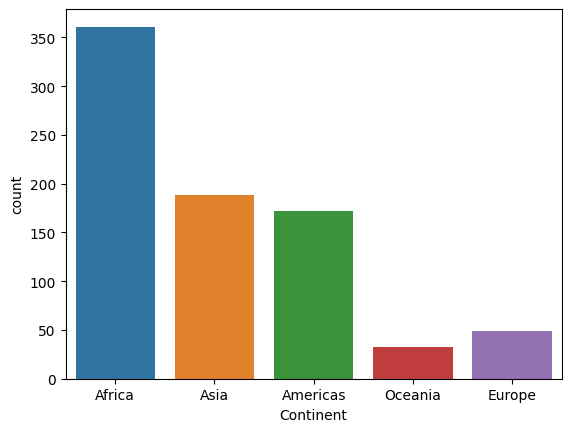

In [18]:
sns.countplot(data=df_drought, x='Continent')